In [9]:
import os
os.environ["OPENAI_API_KEY"] = "sk-"
os.environ["UNSTRUCTURED_API_KEY"] = ""

In [2]:
%pip install -qU pypdf

Note: you may need to restart the kernel to use updated packages.


In [3]:
file_path = "/Users/praveenreddy/GenAI/test/YouTube_Explain/LangChain/data/layout-parser-paper.pdf"

In [4]:
from langchain_community.document_loaders import PyPDFLoader

loader = PyPDFLoader(file_path)
pages = []
async for page in loader.alazy_load():
    pages.append(page)

In [5]:
print(f"{pages[0].metadata}\n")

{'source': '/Users/praveenreddy/GenAI/test/YouTube_Explain/LangChain/data/layout-parser-paper.pdf', 'page': 0}



In [6]:
pages

[Document(metadata={'source': '/Users/praveenreddy/GenAI/test/YouTube_Explain/LangChain/data/layout-parser-paper.pdf', 'page': 0}, page_content='LayoutParser : A Uniﬁed Toolkit for Deep\nLearning Based Document Image Analysis\nZejiang Shen1( \x00), Ruochen Zhang2, Melissa Dell3, Benjamin Charles Germain\nLee4, Jacob Carlson3, and Weining Li5\n1Allen Institute for AI\nshannons@allenai.org\n2Brown University\nruochen zhang@brown.edu\n3Harvard University\n{melissadell,jacob carlson }@fas.harvard.edu\n4University of Washington\nbcgl@cs.washington.edu\n5University of Waterloo\nw422li@uwaterloo.ca\nAbstract. Recent advances in document image analysis (DIA) have been\nprimarily driven by the application of neural networks. Ideally, research\noutcomes could be easily deployed in production and extended for further\ninvestigation. However, various factors like loosely organized codebases\nand sophisticated model conﬁgurations complicate the easy reuse of im-\nportant innovations by a wide audie

In [7]:
print(pages[0].page_content)

LayoutParser : A Uniﬁed Toolkit for Deep
Learning Based Document Image Analysis
Zejiang Shen1(  ), Ruochen Zhang2, Melissa Dell3, Benjamin Charles Germain
Lee4, Jacob Carlson3, and Weining Li5
1Allen Institute for AI
shannons@allenai.org
2Brown University
ruochen zhang@brown.edu
3Harvard University
{melissadell,jacob carlson }@fas.harvard.edu
4University of Washington
bcgl@cs.washington.edu
5University of Waterloo
w422li@uwaterloo.ca
Abstract. Recent advances in document image analysis (DIA) have been
primarily driven by the application of neural networks. Ideally, research
outcomes could be easily deployed in production and extended for further
investigation. However, various factors like loosely organized codebases
and sophisticated model conﬁgurations complicate the easy reuse of im-
portant innovations by a wide audience. Though there have been on-going
eﬀorts to improve reusability and simplify deep learning (DL) model
development in disciplines like natural language processing an

In [9]:
%pip install -qU langchain-unstructured

Note: you may need to restart the kernel to use updated packages.


In [14]:
from langchain_unstructured import UnstructuredLoader

loader = UnstructuredLoader(
    file_path=file_path,
    strategy="hi_res",
    partition_via_api=True,
    coordinates=True,
)
docs = []
for doc in loader.lazy_load():
    docs.append(doc)

INFO: Preparing to split document for partition.
INFO: Starting page number set to 1
INFO: Allow failed set to 0
INFO: Concurrency level set to 5
INFO: Splitting pages 1 to 16 (16 total)
INFO: Determined optimal split size of 4 pages.
INFO: Partitioning 4 files with 4 page(s) each.
INFO: Partitioning set #1 (pages 1-4).
INFO: Partitioning set #2 (pages 5-8).
INFO: Partitioning set #3 (pages 9-12).
INFO: Partitioning set #4 (pages 13-16).
INFO: HTTP Request: POST https://api.unstructuredapp.io/general/v0/general "HTTP/1.1 200 OK"
INFO: HTTP Request: POST https://api.unstructuredapp.io/general/v0/general "HTTP/1.1 200 OK"
INFO: HTTP Request: POST https://api.unstructuredapp.io/general/v0/general "HTTP/1.1 200 OK"
INFO: HTTP Request: POST https://api.unstructuredapp.io/general/v0/general "HTTP/1.1 200 OK"
INFO: Successfully partitioned set #1, elements added to the final result.
INFO: Successfully partitioned set #2, elements added to the final result.
INFO: Successfully partitioned set #

In [15]:
docs

[Document(metadata={'source': '/Users/praveenreddy/GenAI/test/YouTube_Explain/LangChain/data/layout-parser-paper.pdf', 'coordinates': {'points': [[430.70318603515625, 314.6181335449219], [430.70318603515625, 410.7304382324219], [1271.916748046875, 410.7304382324219], [1271.916748046875, 314.6181335449219]], 'system': 'PixelSpace', 'layout_width': 1700, 'layout_height': 2200}, 'filetype': 'application/pdf', 'languages': ['eng'], 'page_number': 1, 'filename': 'layout-parser-paper.pdf', 'category': 'Title', 'element_id': 'b7f58c2fd9c15949a55a62eb84e39575'}, page_content='LayoutParser: A Uniﬁed Toolkit for Deep Learning Based Document Image Analysis'),
 Document(metadata={'source': '/Users/praveenreddy/GenAI/test/YouTube_Explain/LangChain/data/layout-parser-paper.pdf', 'coordinates': {'points': [[45.205963134765625, 602.969970703125], [45.205963134765625, 1555.5555555555554], [100.94444444444446, 1555.5555555555554], [100.94444444444446, 602.969970703125]], 'system': 'PixelSpace', 'layout_

In [17]:
len(docs)

187

In [16]:
docs[0]

Document(metadata={'source': '/Users/praveenreddy/GenAI/test/YouTube_Explain/LangChain/data/layout-parser-paper.pdf', 'coordinates': {'points': [[430.70318603515625, 314.6181335449219], [430.70318603515625, 410.7304382324219], [1271.916748046875, 410.7304382324219], [1271.916748046875, 314.6181335449219]], 'system': 'PixelSpace', 'layout_width': 1700, 'layout_height': 2200}, 'filetype': 'application/pdf', 'languages': ['eng'], 'page_number': 1, 'filename': 'layout-parser-paper.pdf', 'category': 'Title', 'element_id': 'b7f58c2fd9c15949a55a62eb84e39575'}, page_content='LayoutParser: A Uniﬁed Toolkit for Deep Learning Based Document Image Analysis')

In [44]:
docs[0].metadata

{'source': '/Users/praveenreddy/GenAI/test/YouTube_Explain/LangChain/data/layout-parser-paper.pdf',
 'coordinates': {'points': [[430.70318603515625, 314.6181335449219],
   [430.70318603515625, 410.7304382324219],
   [1271.916748046875, 410.7304382324219],
   [1271.916748046875, 314.6181335449219]],
  'system': 'PixelSpace',
  'layout_width': 1700,
  'layout_height': 2200},
 'filetype': 'application/pdf',
 'languages': ['eng'],
 'page_number': 1,
 'filename': 'layout-parser-paper.pdf',
 'category': 'Title',
 'element_id': 'b7f58c2fd9c15949a55a62eb84e39575'}

In [18]:
first_page_docs = [doc for doc in docs if doc.metadata.get("page_number") == 1]

for doc in first_page_docs:
    print(doc.page_content)

LayoutParser: A Uniﬁed Toolkit for Deep Learning Based Document Image Analysis
2 0 2 n u J 1 2 ] V C . s c [ 2 v 8 4 3 5 1 . 3 0 1 2 : v i X r a
Zejiang Shen® (<), Ruochen Zhang?, Melissa Dell®, Benjamin Charles Germain Lee?, Jacob Carlson®, and Weining Li®
1 Allen Institute for AI shannons@allenai.org
2 Brown University ruochen zhang@brown.edu
3 Harvard University {melissadell,jacob carlson}@fas.harvard.edu
4 University of Washington bcgl@cs.washington.edu
5 University of Waterloo w422li@uwaterloo.ca
Abstract. Recent advances in document image analysis (DIA) have been primarily driven by the application of neural networks. Ideally, research outcomes could be easily deployed in production and extended for further investigation. However, various factors like loosely organized codebases and sophisticated model conﬁgurations complicate the easy reuse of im- portant innovations by a wide audience. Though there have been on-going eﬀorts to improve reusability and simplify deep learning (DL)

Extracting tables 

In [19]:
from IPython.display import HTML, display

In [20]:
segments = [
    doc.metadata
    for doc in docs
    if doc.metadata.get("page_number") == 5 and doc.metadata.get("category") == "Table"
]

In [21]:
segments

[{'source': '/Users/praveenreddy/GenAI/test/YouTube_Explain/LangChain/data/layout-parser-paper.pdf',
  'coordinates': {'points': [[371.8935241699219, 380.7769775390625],
    [371.8935241699219, 568.7572021484375],
    [1341.186279296875, 568.7572021484375],
    [1341.186279296875, 380.7769775390625]],
   'system': 'PixelSpace',
   'layout_width': 1700,
   'layout_height': 2200},
  'text_as_html': '<table><thead><tr><th colspan="3">able 1. LUllclll 1ayoul actCCLloll 1110AdCs 111 L1C LayoOulralsel 1110U4cl 200</th></tr><tr><th>Dataset</th><th>| Base Model\'|</th><th>Notes</th></tr></thead><tbody><tr><td>PubLayNet [38]</td><td>F / M</td><td>Layouts of modern scientific documents</td></tr><tr><td>PRImA</td><td>M</td><td>Layouts of scanned modern magazines and scientific reports</td></tr><tr><td>Newspaper</td><td>F</td><td>Layouts of scanned US newspapers from the 20th century</td></tr><tr><td>TableBank [18]</td><td>F</td><td>Table region on modern scientific and business document</td></tr>

In [22]:
page5_data = [
    doc
    for doc in docs
    if doc.metadata.get("page_number") == 5 and doc.metadata.get("category") == "Table"
]

In [23]:
page5_data

[Document(metadata={'source': '/Users/praveenreddy/GenAI/test/YouTube_Explain/LangChain/data/layout-parser-paper.pdf', 'coordinates': {'points': [[371.8935241699219, 380.7769775390625], [371.8935241699219, 568.7572021484375], [1341.186279296875, 568.7572021484375], [1341.186279296875, 380.7769775390625]], 'system': 'PixelSpace', 'layout_width': 1700, 'layout_height': 2200}, 'text_as_html': '<table><thead><tr><th colspan="3">able 1. LUllclll 1ayoul actCCLloll 1110AdCs 111 L1C LayoOulralsel 1110U4cl 200</th></tr><tr><th>Dataset</th><th>| Base Model\'|</th><th>Notes</th></tr></thead><tbody><tr><td>PubLayNet [38]</td><td>F / M</td><td>Layouts of modern scientific documents</td></tr><tr><td>PRImA</td><td>M</td><td>Layouts of scanned modern magazines and scientific reports</td></tr><tr><td>Newspaper</td><td>F</td><td>Layouts of scanned US newspapers from the 20th century</td></tr><tr><td>TableBank [18]</td><td>F</td><td>Table region on modern scientific and business document</td></tr><tr><td

In [24]:
display(HTML(segments[0]["text_as_html"]))

Extracting text from specific sections



In [25]:
conclusion_docs = []
parent_id = -1
for doc in docs:
    if doc.metadata["category"] == "Title" and "Conclusion" in doc.page_content:
        parent_id = doc.metadata["element_id"]
    if doc.metadata.get("parent_id") == parent_id:
        conclusion_docs.append(doc)



In [26]:
conclusion_docs

[Document(metadata={'source': '/Users/praveenreddy/GenAI/test/YouTube_Explain/LangChain/data/layout-parser-paper.pdf', 'coordinates': {'points': [[372.701416015625, 397.3570251464844], [372.701416015625, 738.3629760742188], [1349.6612548828125, 738.3629760742188], [1349.6612548828125, 397.3570251464844]], 'system': 'PixelSpace', 'layout_width': 1700, 'layout_height': 2200}, 'filetype': 'application/pdf', 'languages': ['eng'], 'page_number': 14, 'parent_id': '2d665682ba83d4a2ef20e6084f9f50db', 'filename': 'layout-parser-paper.pdf', 'category': 'NarrativeText', 'element_id': '6a1bfe38f685ad357fff728c1a9ae7ba'}, page_content='LayoutParser provides a comprehensive toolkit for deep learning-based document image analysis. The oﬀ-the-shelf library is easy to install, and can be used to build ﬂexible and accurate pipelines for processing documents with complicated structures. It also supports high-level customization and enables easy labeling and training of DL models on unique document image 

In [27]:
for doc in conclusion_docs:
    print(doc.page_content)

LayoutParser provides a comprehensive toolkit for deep learning-based document image analysis. The oﬀ-the-shelf library is easy to install, and can be used to build ﬂexible and accurate pipelines for processing documents with complicated structures. It also supports high-level customization and enables easy labeling and training of DL models on unique document image datasets. The LayoutParser community platform facilitates sharing DL models and DIA pipelines, inviting discussion and promoting code reproducibility and reusability. The LayoutParser team is committed to keeping the library updated continuously and bringing the most recent advances in DL-based DIA, such as multi-modal document modeling [37, 36, 9] (an upcoming priority), to a diverse audience of end-users.
Acknowledgements We thank the anonymous reviewers for their comments and suggestions. This project is supported in part by NSF Grant OIA-2033558 and funding from the Harvard Data Science Initiative and Harvard Catalyst. 

In [28]:
conclusion_docs = []
parent_id = -1
for doc in docs:
    if doc.metadata["category"] == "Title" and "References" in doc.page_content:
        parent_id = doc.metadata["element_id"]
    if doc.metadata.get("parent_id") == parent_id:
        conclusion_docs.append(doc)



In [29]:
conclusion_docs

[Document(metadata={'source': '/Users/praveenreddy/GenAI/test/YouTube_Explain/LangChain/data/layout-parser-paper.pdf', 'coordinates': {'points': [[388.6244812011719, 1050.94677734375], [388.6244812011719, 1297.01806640625], [1348.6932373046875, 1297.01806640625], [1348.6932373046875, 1050.94677734375]], 'system': 'PixelSpace', 'layout_width': 1700, 'layout_height': 2200}, 'filetype': 'application/pdf', 'languages': ['eng'], 'page_number': 14, 'parent_id': '79ccc2c57c8d67f90627087e18410972', 'filename': 'layout-parser-paper.pdf', 'category': 'NarrativeText', 'element_id': 'ab13d202e4bbf52bd402511ff6c9cc08'}, page_content='[1] Abadi, M., Agarwal, A., Barham, P., Brevdo, E., Chen, Z., Citro, C., Corrado, G.S., Davis, A., Dean, J., Devin, M., Ghemawat, S., Goodfellow, I., Harp, A., Irving, G., Isard, M., Jia, Y., Jozefowicz, R., Kaiser, L., Kudlur, M., Levenberg, J., Man´e, D., Monga, R., Moore, S., Murray, D., Olah, C., Schuster, M., Shlens, J., Steiner, B., Sutskever, I., Talwar, K., Tuc

In [30]:
for doc in conclusion_docs:
    print(doc.page_content)
    print("\n")
    print("\n")

[1] Abadi, M., Agarwal, A., Barham, P., Brevdo, E., Chen, Z., Citro, C., Corrado, G.S., Davis, A., Dean, J., Devin, M., Ghemawat, S., Goodfellow, I., Harp, A., Irving, G., Isard, M., Jia, Y., Jozefowicz, R., Kaiser, L., Kudlur, M., Levenberg, J., Man´e, D., Monga, R., Moore, S., Murray, D., Olah, C., Schuster, M., Shlens, J., Steiner, B., Sutskever, I., Talwar, K., Tucker, P., Vanhoucke, V., Vasudevan, V., Vi´egas, F., Vinyals, O., Warden, P., Wattenberg, M., Wicke, M., Yu, Y., Zheng, X.: TensorFlow: Large-scale machine learning on heterogeneous systems (2015), https://www.tensorflow.org/, software available from tensorﬂow.org




[2] Alberti, M., Pondenkandath, V., W¨ursch, M., Ingold, R., Liwicki, M.: Deepdiva: a highly-functional python framework for reproducible experiments. In: 2018 16th International Conference on Frontiers in Handwriting Recognition (ICFHR). pp. 423–428. IEEE (2018)




[3] Antonacopoulos, A., Bridson, D., Papadopoulos, C., Pletschacher, S.: A realistic dataset 

Extracting text from images

In [42]:
for doc in docs:
    if doc.metadata["category"] == "Image":
        print(doc.metadata["category"])
        print(doc.page_content)
        break

Image
Efficient Data Annotation DIA Model Hub OCR Module = | apoutpate Srruclure] BN (Smrage&\/lsua/rzauonj


In [43]:
for doc in docs:
    if doc.metadata["category"] == "Image" and "Coordinate" in doc.page_content:
        print(doc.metadata["category"])
        print(doc.page_content)
        break

Image
sintenal Quadrsteral Rectange Coordinate % Coordinate + Block Block textblock Extra features Text Type Reading Order [ coordinatel , textblockl textblock2 | layoutl ] layout A list of the layout elements The same transformation and operation APIs


In [37]:
conclusion_docs = []
parent_id = -1
for doc in docs:
    if doc.metadata["category"] == "Image" and "Model Customization" in doc.page_content:
        parent_id = doc.metadata["element_id"]
    if doc.metadata.get("parent_id") == parent_id:
        conclusion_docs.append(doc)



it may be advantageous to skip the PDF parsing, instead casting a PDF page to an image and passing it to a model directly. 

In [1]:
%pip install -qU PyMuPDF pillow langchain-openai

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.32.0 requires pillow<11,>=7.1.0, but you have pillow 11.0.0 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [7]:
import base64
import io

import fitz
from PIL import Image

from IPython.display import Image as IPImage
from IPython.display import display

In [4]:
pdf_document = fitz.open(file_path)
page = pdf_document.load_page(2 - 1)  # input is one-indexed
pix = page.get_pixmap()
img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)

buffer = io.BytesIO()
img.save(buffer, format="PNG")



In [5]:
image = base64.b64encode(buffer.getvalue()).decode("utf-8")

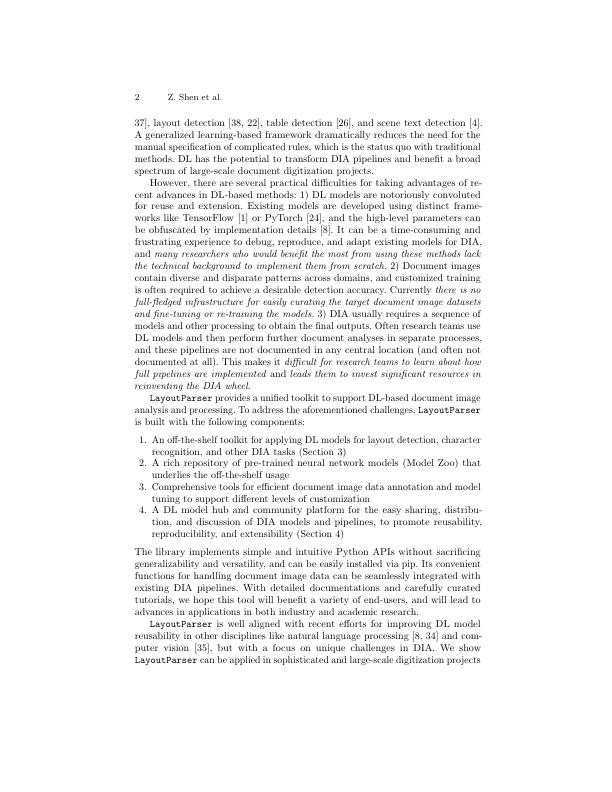

In [8]:
display(IPImage(data=base64.b64decode(image)))

In [10]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o-mini")

In [11]:
from langchain_core.messages import HumanMessage

query = "What are the practical difficulties for taking advantages of recent advances in DL-based methods?"

message = HumanMessage(
    content=[
        {"type": "text", "text": query},
        {
            "type": "image_url",
            "image_url": {"url": f"data:image/jpeg;base64,{image}"},
        },
    ],
)
response = llm.invoke([message])
print(response.content)

The practical difficulties in taking advantage of recent advances in deep learning (DL)-based methods for document image analysis (DIA) include:

1. **Complexity of DL Models**: DL models are often complicated and require a deep understanding of various frameworks (like TensorFlow or PyTorch). This complexity can be a barrier for researchers who may lack the technical background to implement these models from scratch.

2. **Diverse Document Image Content**: Document images often contain varied layouts and patterns, making it challenging to achieve high detection accuracy. Customized training is frequently needed, which adds to the difficulty.

3. **Lack of Infrastructure**: There is often no comprehensive infrastructure available for efficiently curating document image datasets or for fine-tuning models, which can lead to inconsistency and inefficiency in the development process.

4. **Sequential Processing**: The typical process involves running different models for various analysis t

To know how we feed all this data into RAG,  Please watch RAG video in my channel